In [24]:
from sklearn import datasets #sklearn 패키지 내 boston 데이터 셋을 불러오기 위한 모듈

import pandas as pd # pandas 모듈을 pd로 이름 변경
#데이터 분석, 가공, 처리 등을 쉽게 하기 위한 자료구조와 처리 함수들을 제공하는 패키지

import numpy as np # numpy 모듈을 np로 이름 변경
#파이썬 언어를 위한 행렬, 벡터 등의 수학 계산을 위한 자료구조와 계산 함수를 제공하는 패키지

from sklearn import linear_model # scitkit learn 모듈 내 linear_model 을 불러옴

from sklearn.metrics import mean_squared_error
#sklearn 패키지에서 제공하는 MSE를 구하기 위한 모듈

import matplotlib
#플롯(그래프)를 그릴 때 주로 쓰이는 2D,3D 플롯팅 패키지

import matplotlib.pyplot as plt
#matplotlib의 서브 패키지로 Matlab 처럼 플롯을 그려주는 패키지

%matplotlib inline 
# matplotlib의 시각화 결과를 ipython notebook 내에서 출력하게 하는 함수
matplotlib.style.use('ggplot') #matplotlib 패키지에서 제공하는 스타일 중 ggplot 을 지정

In [5]:
boston_house_prices = datasets.load_boston() #datasets 모듈 내 보스턴 데이터를 로드하여 저장
print(boston_house_prices.keys()) #보스턴 데이터의 키값들을 알려줌 예를들면 boston_house_prices.(data, target,feature_names...)
print(boston_house_prices.data.shape) #data set에 대한 행 열 길이 출력
print(boston_house_prices.feature_names) #data set에 대한 컬럼 (특징) 이름을 출력

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston_house_prices.DESCR) #data set의 세부 내용 출력

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
data_frame = pd.DataFrame(boston_house_prices.data) #data set을 pandas의 dataframe형으로 변경 후 저장
data_frame.tail() #마지막 5개 데이터를 출력함

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [8]:
data_frame.columns = boston_house_prices.feature_names #data_frame의 컬럼(특징)을 boston_house_prices의 feature_names로 변경
data_frame.tail() #마지막 5개 데이터를 출력

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [9]:
data_frame['Price'] = boston_house_prices.target 
#data_frame에 Price란 컬럼을 추가하여 내용을 boston_house_prices.target에 저장된 데이터 사용

data_frame.tail()#마지막 5개 데이터를 출력

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


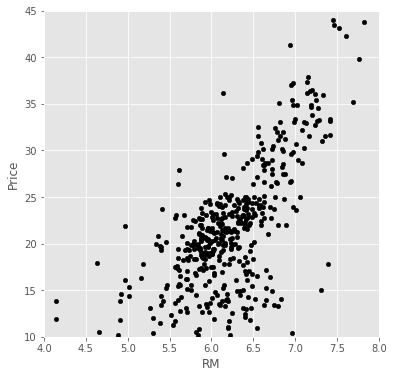

In [12]:
#산점도 나타내기
data_frame.plot(kind="scatter", x="RM", y="Price", figsize=(6,6), color="black", xlim=(4,8), ylim=(10,45))
#산점도 표시, x축은 RM값, y축은 Price값, 사이즈 6,6 , 색상 검정, x축 4~8 사이값, y축 10~45 사이값

In [15]:
linear_regression = linear_model.LinearRegression() #선형회귀분석 모델 지정
linear_regression.fit(X =pd.DataFrame(data_frame["RM"]), y=data_frame["Price"]) 
#선형회귀분석 모델에 맞게 학습하는 함수(단,독립변수 X값은 2차원 형태로 바꾸기위해 pd.DataFrame사용/ 종속변수 y는 기존형태)

prediction = linear_regression.predict(X=pd.DataFrame(data_frame["RM"]))
#학습한 선형회귀분석 모델을 통해 새로운 값을 예측하는 함수 저장

print('a value = ', linear_regression.intercept_) #선형회귀분석식의 a계수 출력
print('b value = ', linear_regression.coef_) #선형회귀분석식의 b계수 출력


# y= a+bX+e

#y는 특정 관측치(예상값)에 대한 종속변수의 실제값
#X는 이미 알려진 독립변수의 값
#a는 X값이 변해도 Y값에는 영향을 주지 않는 회귀 계수
#b는 X의 영향력을 크기와 부호로 나타내 주는 회귀 계수, 독립변수X의 기울기
#e는 특정 관측치(예상값)과 실제값의 오차항

a value =  -34.67062077643857
b value =  [9.10210898]


In [17]:
#적합도 검증
residuals = data_frame["Price"]-prediction #실제 Price값에서 모델을 통해 예측한 Price값을 빼 잔차를 저장
residuals.describe() #다양한 요약 통계를 생성하는 함수(숫자형인경우 전체개수,평균,표준편차,최대값,최소값,백분위수)
#Pandas.DataFrame.describe()


count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [20]:
#적합도 검증
SSE = (residuals**2).sum()
SST = ( (data_frame["Price"]-data_frame["Price"].mean() )**2).sum()
R_squared = 1-(SSE/SST)
print('R_squared = ', R_squared) #R의 제곱 즉 결정계수 제곱근

#numpy.sum()
#numpy.mean()

#SSE = 오차 제곱 합 (각 오차(실제값-예측값)의 제곱들의 합), 즉 실제값과 예측값이 어느정도 오차가 있는지의 정도
#SST = (실제값-실제평균값)의 제곱 합, 즉 실제값들이 실제평균으로부터 흩어진 정도
#SSR = (예측치-실제평균값)의 제곱 합, 즉 예측값들이 실제평균으로부터 흩어진 정도
#결정계수 R^2 = SSR/SST = 1 - (SSE/SST) 

R_squared =  0.4835254559913341


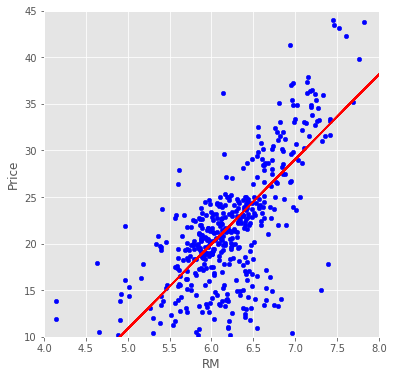

In [22]:
#산점도 나타내기
data_frame.plot(kind="scatter", x="RM", y="Price", figsize=(6,6), color="blue", xlim=(4,8), ylim=(10,45))
#산점도 표시, x축은 RM값, y축은 Price값, 사이즈 6,6 , 색상 검정, x축 4~8 사이값, y축 10~45 사이값

plt.plot(data_frame["RM"], prediction, color="red") #RM값에 따른 prediction(예측값)을 회귀선으로 보여줌

In [25]:
print('score = ', linear_regression.score(X = pd.DataFrame(data_frame["RM"]), y=data_frame["Price"]))
#2차원 X의 dataFrame 형태와 y로 지정하여 학습한 모델을 통해 예측값과 실제값 비교한 성능 평가 (결정계수)
print('Mean_Squared_Error = ', mean_squared_error(prediction, data_frame["Price"]))
#학습한 모델을 통해 나온 예측값과 실제값의 평균제곱오차을 구함 
print('RMSE = ', mean_squared_error(prediction, data_frame["Price"])**0.5)
#MSE를 루트 적용한 값 RMSE

score =  0.4835254559913343
Mean_Squared_Error =  43.60055177116956
RMSE =  6.603071389222561
